

---


# ***Covid19_EDA***

---



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime
from dateutil.relativedelta import relativedelta

sns.set()

# Exploring the Data

In [ ]:
df = pd.read_csv('https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-daily-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494400 entries, 0 to 494399
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      494400 non-null  object 
 1   Country_code       492340 non-null  object 
 2   Country            494400 non-null  object 
 3   WHO_region         494400 non-null  object 
 4   New_cases          210665 non-null  float64
 5   Cumulative_cases   494400 non-null  int64  
 6   New_deaths         154088 non-null  float64
 7   Cumulative_deaths  494400 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 30.2+ MB


In [ ]:
# change float format in description
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,"210,665.0","494,400.0","154,088.0","494,400.0"
mean,"3,695.6","2,056,821.8",46.1,"21,756.1"
std,"48,527.1","8,556,336.6",242.3,"87,048.8"
min,"-65,079.0",0.0,"-3,520.0",0.0
25%,3.0,"6,607.0",0.0,41.0
50%,60.0,"60,939.5",2.0,690.0
75%,675.0,"661,103.0",15.0,"7,996.0"
max,"6,966,046.0","103,436,829.0","44,047.0","1,226,890.0"


In [ ]:
df.describe(include='object')

,Date_reported,Country_code,Country,WHO_region
count,494400,492340,494400,494400
unique,2060,239,240,7
top,2025-08-24,AI,Anguilla,EUR
freq,240,2060,2060,127720


# Duplicate Values

In [ ]:
# Check duplicates
print("Number of duplicate rows:")
df.duplicated().sum()

Number of duplicate rows:


np.int64(0)

# Missing Values

In [ ]:
print(df.isnull().sum())

,0
Date_reported,0
Country_code,2060
Country,0
WHO_region,0
New_cases,283735
Cumulative_cases,0
New_deaths,340312
Cumulative_deaths,0


In [ ]:
print(round(df.isna().mean()*100,2), "% missing values per column")

Date_reported        0.0
Country_code         0.4
Country              0.0
WHO_region           0.0
New_cases           57.4
Cumulative_cases     0.0
New_deaths          68.8
Cumulative_deaths    0.0
dtype: float64 % missing values per column


In [ ]:
df.fillna(0, inplace=True)

# **Clean & Prepare Columns**

# ***Rename Columns***

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.sample()

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
124417,2021-06-05,CZ,Czechia,EUR,336.0,1683789,7.0,30427


# ***Date_reported***

In [ ]:
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%Y-%m-%d')

In [ ]:
# Extract year, month for filtering and grouping
df['year'] = df['date_reported'].dt.year
df['month'] = df['date_reported'].dt.month


In [ ]:
# Date range
print("Data period:", df.date_reported.min(), "to", df.date_reported.max())
total_period = df.date_reported.max() - df.date_reported.min()
print("Total days:", total_period.days)


# ***Country Analysis (Example: Egypt)***

In [ ]:
df.country_code.nunique(), df.country.nunique()

(240, 240)

In [ ]:
df.drop('country_code', axis =1, inplace=True)

In [ ]:
'Egypt' in df.country.unique()

True

In [ ]:
egypt_df = df[df.country == 'Egypt']

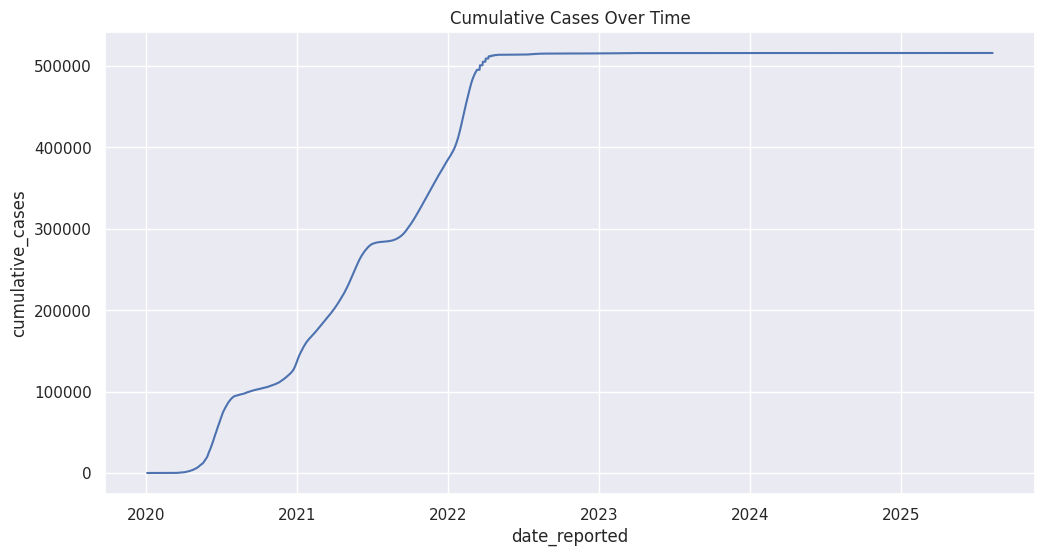

In [ ]:
# Plot cumulative cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date_reported', y='cumulative_cases', data=egypt_df)
plt.title('Cumulative Cases Over Time – Egypt')
plt.show()


In [ ]:
# Plotly version
px.line(egypt_df, x='date_reported', y='cumulative_cases',
        title='Cumulative Cases Over Time – Egypt', width=800, height=400)

In [ ]:
def plot_cumulative(country, column='cumulative_cases'):
    data = df[df.country == country]
    fig = px.line(data, x='date_reported', y=column,
                  title=f'{column.replace("_"," ").title()} Over Time – {country}', width=800, height=400)
    fig.show()


In [ ]:
plot_cumulative('United States of America', 'cumulative_deaths')


In [ ]:
def cumulative_deaths(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_deaths',
                     title= f'Cumulative Deaths Over Time for {country}', width=800, height=400)
    fig.show()

In [ ]:
cumulative_deaths('Egypt')

In [ ]:
cumulative_deaths('United States of America')

In [ ]:
# Cumulative Deaths for a specific country over specific period
def cumulative_cases_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported.between(start_date, end_date))]
    fig = px.line(data, x='date_reported', y='cumulative_cases', title= f'Cumulative Cases for {country} from {start_date} to {end_date}', width=800, height=400)
    fig.show()

In [ ]:
cumulative_cases_period('Egypt', '2020-03-01', '2020-05-01')

# ***Total Cases by Month and Year***

In [ ]:
# Create Columns for year, month
df['year'] = df.date_reported.dt.year
df['month'] = df.date_reported.dt.month

In [ ]:
df.head()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month
0,2020-01-04,Anguilla,AMR,0.0,0,0.0,0,2020,1
1,2020-01-04,Azerbaijan,EUR,0.0,0,0.0,0,2020,1
2,2020-01-04,Bangladesh,SEAR,0.0,0,0.0,0,2020,1
3,2020-01-04,Barbados,AMR,0.0,0,0.0,0,2020,1
4,2020-01-04,Brazil,AMR,0.0,0,0.0,0,2020,1


In [ ]:
# Create month-year column
df['month_year'] = df.date_reported.dt.to_period('M').astype(str)

In [ ]:
px.bar(df, x='month_year', y='new_cases', title='New Cases Over Time', width=900, height=400)

## ***plot total cases for any country***

In [ ]:
def total_cases(country, start_date=df.date_reported.min(), end_date=df.date_reported.max()):
    data = df[df.country == country]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year',
                       title=f'Total New Cases for {country}', width=900, height=400)
    fig.show()

total_cases('Egypt')

# ***Region Analysis***

In [ ]:
# WHO regions
df.who_region.unique()

In [ ]:
# Total cases by region
px.bar(df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False),
       title='Total Cases by WHO Region', width=900, height=500)

array(['AMR', 'EUR', 'SEAR', 'AFR', 'WPR', 'EMR', 'OTHER'], dtype=object)

# ***Top Countries Analysis***

In [ ]:
def top10_countries(df, column):
    data = df.groupby('country')[column].max().nlargest(10)
    fig = px.bar(data, title=f'Top 10 Countries with Highest {column.replace("_"," ").title()}', width=900, height=500)
    fig.update(layout_showlegend=False)
    fig.update_layout(xaxis_title='Country', yaxis_title=column.replace("_"," ").title())
    fig.show()

In [ ]:
top10_countries(df, 'new_cases')
top10_countries(df, 'new_deaths')
top10_countries(df, 'cumulative_cases')
top10_countries(df, 'cumulative_deaths')

In [ ]:
data = df.groupby('country').max()

fig = make_subplots(rows=2, cols=2, subplot_titles=('New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths'))
fig.add_trace(go.Bar(x=data['new_cases'].nlargest(10).index, y=data['new_cases'].nlargest(10).values), row=1, col=1)
fig.add_trace(go.Bar(x=data['new_deaths'].nlargest(10).index, y=data['new_deaths'].nlargest(10).values), row=1, col=2)
fig.add_trace(go.Bar(x=data['cumulative_cases'].nlargest(10).index, y=data['cumulative_cases'].nlargest(10).values), row=2, col=1)
fig.add_trace(go.Bar(x=data['cumulative_deaths'].nlargest(10).index, y=data['cumulative_deaths'].nlargest(10).values), row=2, col=2)
fig.update(layout_showlegend=False, height=900, width=1200, title_text='Top 10 Countries – Cases & Deaths')

fig.show()


# ***Choropleth Maps***

In [ ]:
df_all_max = df.groupby('country').max()
df_2021_max = df[df.year == 2021].groupby('country').max()
df_2022_max = df[df.year == 2022].groupby('country').sum()

In [ ]:
px.choropleth(df_all_max, locations=df_all_max.index, locationmode='country names',
              color='cumulative_cases', width=1000, height=600, title='World Wide Cumulative Cases')


# ***Reusable function***

In [ ]:
def plot_map(data, column):
    data = dict(type = 'choropleth',
           locations = data.index,
            locationmode = 'country names',
            z = data[column],
            text = data.index,
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title': column } )

    layout = dict(title = f'World wide {column} covid19 cases',
             geo = dict(showframe = False, projection = {'type':'natural earth'}))

    choromap = go.Figure(data=[data],layout=layout)
    choromap.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=1000, height=600)
    return(choromap)

In [ ]:
plot_map(df_all_max, 'cumulative_cases')

In [ ]:
plot_map(df_all_max, 'cumulative_deaths')

# ***Seasonal Analysis***

In [ ]:
# Map months to seasons
month_dict = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}

df['season'] = df['month'].map(month_dict)
df.sample()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year,season
280783,18-03-2023,Cook Islands,WPR,0.0,7033,0.0,2,2023,3,2023-03,Spring


In [ ]:
data1 = df.groupby('season')[['new_cases', 'cumulative_deaths']].sum().reset_index()

fig1 = px.bar(data1, x='season', y='new_cases',
              title='Total New Cases per Season',
              width=800, height=400)
fig1.show()

In [ ]:
fig2 = px.bar(data1, x='season', y='cumulative_deaths',
              title='Total Deaths per Season',
              width=800, height=400)
fig2.show()

#**Key insight :**
1. **Most new cases in Winter:**
* when viruse is active with cold weather
* People spend more time indoors.
* Weaker immunity in winter.
* The spread of other viruses (such as influenza) → Increased chances of cross-infection.

____

2. **Most deaths in Spring and Summer:**
* Deaths typically take two weeks to a month after the peak of infections.
* if infections are high in the winter, deaths may increase in the spring.
__

# ***Seasonal cases by WHO region***

In [ ]:
data2 = df.groupby(['who_region', 'season'])[['new_cases', 'cumulative_deaths']].sum().reset_index()

fig3 = px.bar(data2, x='season', y='new_cases', color='who_region',
              title='Total New Cases per Season by Region',
              barmode='group', width=900, height=500)
fig3.show()

In [ ]:
fig4 = px.bar(data2, x='season', y='cumulative_deaths', color='who_region',
              title='Total Deaths per Season by Region',
              barmode='group', width=900, height=500)
fig4.show()

#**key insights :**
1. Data showed that Europe and the Americas were the most affected in terms of the number of new cases and deaths throughout the year:
* reflecting the impact of population density
* aging
* chronic diseases

2. **The Western Pacific Region (WPR),they include: China, Japan, South Korea, Australia, etc....)** recorded high new cases but was relatively successful in reducing deaths, which may be attributed to strict preventive health policies.